### Импорт всех необходимых библиотек

In [1]:
import numpy as np  # для матричных вычислений
import pandas as pd  # для анализа и предобработки данных
import matplotlib.pyplot as plt  # для визуализации
import seaborn as sns  # для визуализации
from sklearn import linear_model  # линейные модели
from sklearn import metrics  # метрики
from sklearn import preprocessing  # пред обработка
from sklearn.model_selection import train_test_split  # разделение выборки

# Тема 1

## Insurance

In [2]:
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Подготовка
#### Валидация

In [3]:
display(data.isnull().sum(), data.dtypes)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### Предобработка

In [4]:
data['sex'] = data['sex'].apply(lambda x: False if x == 'female' else True)
data['smoker'] = data['smoker'].apply(lambda x: False if x == 'no' else True)
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,False,27.900,0,True,16884.92400,False,False,False,True
1,18,True,33.770,1,False,1725.55230,False,False,True,False
2,28,True,33.000,3,False,4449.46200,False,False,True,False
3,33,True,22.705,0,False,21984.47061,False,True,False,False
4,32,True,28.880,0,False,3866.85520,False,True,False,False


In [5]:
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']
display(X, y, features)

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,False,27.900,0,True,False,False,False,True
1,18,True,33.770,1,False,False,False,True,False
2,28,True,33.000,3,False,False,False,True,False
3,33,True,22.705,0,False,False,True,False,False
4,32,True,28.880,0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,True,30.970,3,False,False,True,False,False
1334,18,False,31.920,0,False,True,False,False,False
1335,18,False,36.850,0,False,False,False,True,False
1336,21,False,25.800,0,False,False,False,False,True


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

### Задания
#### Задание 1

In [6]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
display(len(train_X), len(test_X))

1070

268

#### Задание 2

In [7]:
model = linear_model.LinearRegression()
model.fit(train_X, train_y)

def get_metrix(m, data_test, y_true):
    predictions = m.predict(data_test)
    r2 = metrics.r2_score(y_true, predictions)
    mae = metrics.mean_absolute_error(y_true, predictions)
    mape = metrics.mean_absolute_percentage_error(y_true, predictions)
    
    return {'r2': np.round(r2, 3), 'mae': np.round(mae), 'mape_%': np.round(mape * 100)}

display({'intercept': np.round(model.intercept_, 2)})
display(get_metrix(model, test_X, test_y))
display(get_metrix(model, train_X, train_y))

{'intercept': -12390.8}

{'r2': 0.784, 'mae': 4181.0, 'mape_%': 47.0}

{'r2': 0.742, 'mae': 4208.0, 'mape_%': 42.0}

#### Задание 3

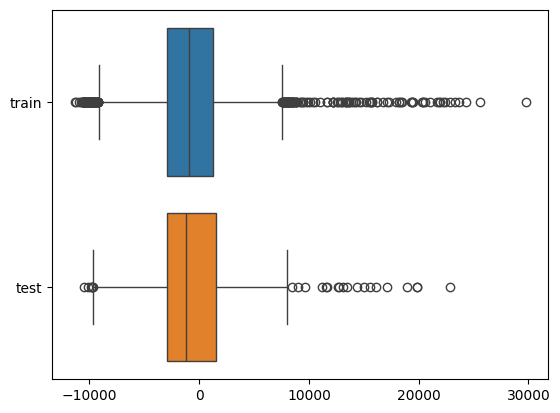

In [8]:
sns.boxplot(pd.DataFrame({'train': (train_y - model.predict(train_X)), 'test': (test_y - model.predict(test_X))}), orient='h')
plt.show()

#### Задание 4

In [9]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(train_X, train_y)

model_poly = preprocessing.PolynomialFeatures(include_bias=False)
model_poly.fit(scaler.transform(train_X))

display(model_poly.n_output_features_, model_poly.n_features_in_)

54

9

#### Задание 5

In [10]:
model_lin_poly = linear_model.LinearRegression()
model_lin_poly.fit(model_poly.transform(scaler.transform(train_X)), train_y)

display(get_metrix(model_lin_poly, model_poly.transform(scaler.transform(test_X)), test_y))

{'r2': 0.867, 'mae': 2748.0, 'mape_%': 31.0}

#### Задание 6

In [11]:
display(model_lin_poly.coef_)

array([-6.13187729e+16,  8.41033718e+14,  5.83238304e+15, -1.13904139e+16,
       -6.00962542e+13,  9.58667470e+14,  7.01129182e+14,  4.04850498e+14,
        1.29733639e+15,  8.36800000e+03,  8.56000000e+02,  1.06800000e+03,
       -1.65600000e+03,  1.64000000e+02,  6.13187729e+16,  6.13187729e+16,
        6.13187729e+16,  6.13187729e+16, -9.22451557e+13,  6.59500000e+02,
       -1.23675000e+03,  2.44250000e+02, -7.48788562e+14, -7.48788562e+14,
       -7.48788562e+14, -7.48788562e+14, -9.70562500e+03,  1.55137500e+03,
        5.48453125e+04, -5.83238304e+15, -5.83238304e+15, -5.83238304e+15,
       -5.83238304e+15, -2.13100000e+03, -2.23400000e+03,  1.13904139e+16,
        1.13904139e+16,  1.13904139e+16,  1.13904139e+16,  1.31600009e+14,
       -7.15037545e+13, -7.15037545e+13, -7.15037545e+13, -7.15037545e+13,
        5.94260639e+14,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.51798927e+14,  0.00000000e+00,  0.00000000e+00,  1.14807761e+15,
        0.00000000e+00,  

#### Задание 7

In [12]:
lasso = linear_model.Lasso(max_iter=2000)
lasso.fit(model_poly.transform(scaler.transform(train_X)), train_y)
          
display(get_metrix(lasso, model_poly.transform(scaler.transform(test_X)), test_y))

{'r2': 0.867, 'mae': 2719.0, 'mape_%': 30.0}